In [221]:
#from numpy import array

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, RNN, GRU, SimpleRNN
from keras.layers.embeddings import Embedding

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**Parte-1: modelo Embedding simple**

In [3]:
df = pd.read_csv("/content/drive/My Drive/data/sms_spam.csv")
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [220]:
df.shape

(5559, 2)

In [6]:
#len([df.text[k] for k,cc in enumerate(df.type) if cc=='spam'])

747

In [7]:
docs = list(df['text'])   
labels = np.array(df['type'] =='spam') 

print(len(docs))
print(labels.shape)

5559
(5559,)


In [8]:
# Hagamos ahora una partición en train y test, y el de validación se definirá a partir de train en model.fit:

x_train, x_test, y_train, y_test = train_test_split(docs, labels, train_size=.80) 

In [104]:
vocab_size = 1000   # total de palabras de tu vocabulario... definámosla por el momento...

encoded_train = [one_hot(d, vocab_size) for d in x_train]   #list
encoded_test = [one_hot(d, vocab_size) for d in x_test]

In [105]:
print(encoded_train)

[[684, 569, 333, 898, 843, 846, 937, 813], [219, 410, 182, 370, 90, 201, 751, 264, 756, 873, 567, 702, 445, 907, 136, 170, 761, 831, 479, 263], [880, 182, 569, 83, 194, 479, 122, 562, 293, 182, 680, 293, 54, 652, 518, 182, 846, 115, 569, 443, 407, 479, 465, 800, 589, 443], [99, 689, 936, 293, 781, 674, 41, 951, 952, 404, 907, 584, 51, 456, 684, 970, 934, 689, 293, 715, 166, 676, 299, 571, 792, 4, 700, 675], [943, 117, 228, 182, 766, 460, 12, 81, 569, 60, 976, 331], [83, 170, 842, 293, 694, 549, 15, 296, 864, 228, 589, 170, 60, 563], [85, 277, 527, 658, 154, 60, 271, 800, 934, 951, 3, 293, 388, 684], [630, 671, 117, 630, 684, 761], [170, 119, 581, 524, 684, 300, 518, 170, 959, 264, 438, 806], [170, 243, 928, 942, 464, 579, 170, 952, 781, 11], [747, 781, 70, 90, 970, 336, 60, 620, 654, 778, 990, 615, 40, 939, 355, 976, 862, 831, 182, 895, 327, 293, 128, 684, 937, 83, 267, 320, 850], [479, 282, 151, 293, 182, 26, 70, 905, 935, 154, 182, 106, 456, 366, 296, 934, 665, 142, 684, 640, 765, 29

In [106]:
sent_length = 25   # longitud de los enunciados de entrada a la red neuronal
padded_train = pad_sequences(encoded_train, maxlen=sent_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=sent_length, padding='post')

print(padded_train)

[[684 569 333 ...   0   0   0]
 [219 410 182 ...   0   0   0]
 [182 569  83 ... 800 589 443]
 ...
 [170 724 479 ...   0   0   0]
 [785 386  40 ... 142 348 406]
 [333 800 293 ... 469 264 337]]


In [110]:
n_epochs = 8
sz_vec = 32   # size embedding


model = Sequential()

model.add(Embedding(input_dim=vocab_size, 
                    output_dim=sz_vec, 
                    input_length=sent_length))


model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 25, 32)            32000     
_________________________________________________________________
flatten_26 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 801       
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


Total de parámetros:

Embidding_layer_size = embedding_size * vocabulary_size

Flatten_size = sentence_size * embedding_size nodos (units) pero no genera parámetros.

Output_layer_sz = flatten_size * neuron_size + neuron_size(bias)

In [111]:
H = model.fit(padded_train, y_train, validation_split=0.2, epochs=n_epochs, verbose=1)

Epoch 1/8
112/112 [==============================] - 1s 5ms/step - loss: 0.5103 - accuracy: 0.8490 - val_loss: 0.1877 - val_accuracy: 0.9449
Epoch 2/8
112/112 [==============================] - 0s 4ms/step - loss: 0.1726 - accuracy: 0.9586 - val_loss: 0.1102 - val_accuracy: 0.9775
Epoch 3/8
112/112 [==============================] - 0s 4ms/step - loss: 0.1094 - accuracy: 0.9739 - val_loss: 0.0778 - val_accuracy: 0.9798
Epoch 4/8
112/112 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.9829 - val_loss: 0.0654 - val_accuracy: 0.9831
Epoch 5/8
112/112 [==============================] - 0s 4ms/step - loss: 0.0482 - accuracy: 0.9897 - val_loss: 0.0568 - val_accuracy: 0.9843
Epoch 6/8
112/112 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9945 - val_loss: 0.0544 - val_accuracy: 0.9865
Epoch 7/8
112/112 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9926 - val_loss: 0.0513 - val_accuracy: 0.9854
Epoch 8/8
112

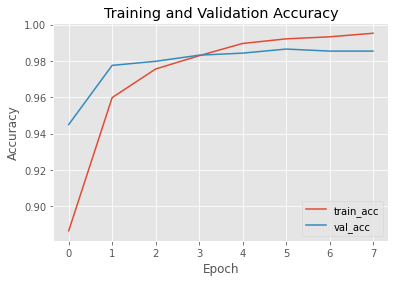

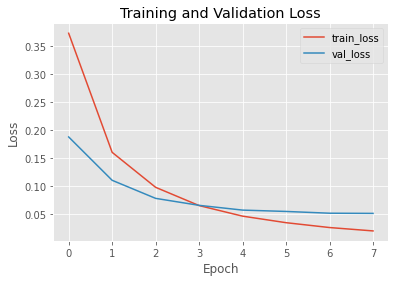

In [112]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [113]:
loss, accuracy = model.evaluate(padded_test, y_test, verbose=0)
print('Accuracy-modelo1: %f' % (accuracy*100))

Accuracy: 97.841728


#**Parte-2: Embedding + RNN(GRU/LSTM) + learning_rate**

In [124]:
n_epochs = 8
sz_vec = 32   # size embedding


model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, 
                    output_dim=sz_vec, 
                    input_length=sent_length))


model2.add(SimpleRNN(units=64))

model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)  # LearningRate:  Muy grande puede oscilar demasiado.
                                                                  # Muy pequeño es más estable, pero converge más despacio
                                                                  # y requerirá más épocas para converger.

model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 25, 32)            32000     
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 64)                6208      
_________________________________________________________________
flatten_35 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 38,273
Trainable params: 38,273
Non-trainable params: 0
_________________________________________________________________


Total de parámetros:

Embidding_layer_size = embedding_size * vocabulary_size

simpleRNN_layer_size = embedding_size * hidden_units + hidden_units

Flatten_size = tiene las misma unidades de la capa previa, pero no genera parámetros.

Output_layer_sz = flatten_size * neuron_size + neuron_size(bias)

In [125]:
H2 = model2.fit(padded_train, y_train, validation_split=0.2, epochs=n_epochs, verbose=1)

Epoch 1/8
112/112 [==============================] - 3s 21ms/step - loss: 0.3345 - accuracy: 0.8845 - val_loss: 0.1114 - val_accuracy: 0.9663
Epoch 2/8
112/112 [==============================] - 2s 19ms/step - loss: 0.0767 - accuracy: 0.9798 - val_loss: 0.1032 - val_accuracy: 0.9742
Epoch 3/8
112/112 [==============================] - 2s 19ms/step - loss: 0.0488 - accuracy: 0.9892 - val_loss: 0.1490 - val_accuracy: 0.9539
Epoch 4/8
112/112 [==============================] - 2s 19ms/step - loss: 0.0293 - accuracy: 0.9932 - val_loss: 0.1123 - val_accuracy: 0.9652
Epoch 5/8
112/112 [==============================] - 2s 19ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0698 - val_accuracy: 0.9730
Epoch 6/8
112/112 [==============================] - 2s 19ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.1152 - val_accuracy: 0.9719
Epoch 7/8
112/112 [==============================] - 2s 19ms/step - loss: 0.0104 - accuracy: 0.9984 - val_loss: 0.0875 - val_accuracy: 0.9764
Epoch 

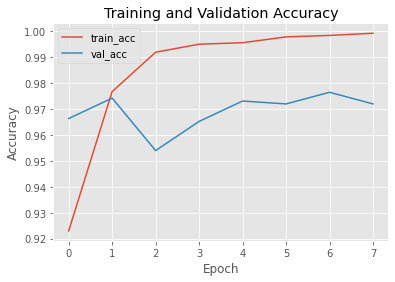

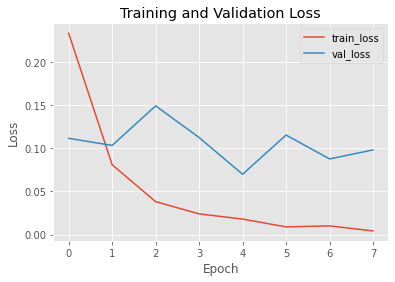

In [126]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H2.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H2.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H2.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H2.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [92]:
loss, accuracy = model2.evaluate(padded_test, y_test, verbose=0)
print('Accuracy-modelo2: %f' % (accuracy*100))

Accuracy: 96.223021


#**Parte-3: Embedding + LSTM(RNN/GRU) + Dropout**

In [189]:
n_epochs = 10  # le damos más épocas para apreciar el efecto del Dropout
sz_vec = 32   # size embedding


model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, 
                    output_dim=sz_vec, 
                    input_length=sent_length))

#model.add(Dropout(0.5))   # Dropout afuera y antes de la capa Recurrente.
                           # Ayudan a disminuir el overfitting, pero es mejor usar
                           # la que está como argumento de LSTM
model3.add(LSTM(units=64, dropout=0.5, recurrent_dropout=0.5 ))

#model.add(Dropout(0.5))   # Dropout afuera y después de la capa Recurrente.

model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.0001) 
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_53 (Embedding)     (None, 25, 32)            32000     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                24832     
_________________________________________________________________
flatten_52 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 65        
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________


In [190]:
H3 = model3.fit(padded_train, y_train, validation_split=0.2, epochs=n_epochs, verbose=1)

Epoch 1/10
112/112 [==============================] - 14s 102ms/step - loss: 0.6571 - accuracy: 0.8464 - val_loss: 0.3589 - val_accuracy: 0.8663
Epoch 2/10
112/112 [==============================] - 11s 101ms/step - loss: 0.3034 - accuracy: 0.8689 - val_loss: 0.2237 - val_accuracy: 0.8663
Epoch 3/10
112/112 [==============================] - 11s 97ms/step - loss: 0.2289 - accuracy: 0.8681 - val_loss: 0.1604 - val_accuracy: 0.9090
Epoch 4/10
112/112 [==============================] - 11s 96ms/step - loss: 0.1625 - accuracy: 0.9391 - val_loss: 0.1311 - val_accuracy: 0.9652
Epoch 5/10
112/112 [==============================] - 11s 98ms/step - loss: 0.1361 - accuracy: 0.9616 - val_loss: 0.1265 - val_accuracy: 0.9663
Epoch 6/10
112/112 [==============================] - 11s 99ms/step - loss: 0.1106 - accuracy: 0.9697 - val_loss: 0.1260 - val_accuracy: 0.9618
Epoch 7/10
112/112 [==============================] - 11s 98ms/step - loss: 0.0933 - accuracy: 0.9766 - val_loss: 0.1228 - val_accurac

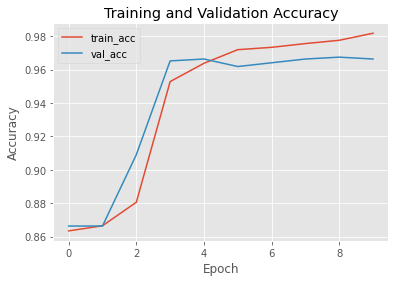

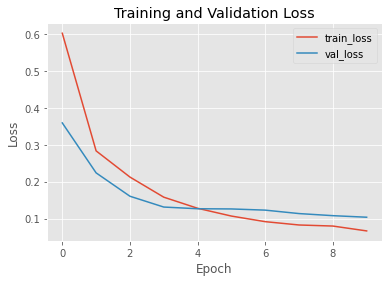

In [191]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H3.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H3.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H3.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H3.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [192]:
loss, accuracy = model3.evaluate(padded_test, y_test, verbose=0)
print('Accuracy : modelo3: %f' % (accuracy*100))

Accuracy : modelo3: 96.852517


#**Parte-4: CNN + LSTM : información Espacial + Temporal**

In [240]:
n_epochs = 15  # le damos más épocas para apreciar el efecto de ambas capas
sz_vec = 32   # size embedding


model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, 
                    output_dim=sz_vec, 
                    input_length=sent_length))

# Capas convolucionales (espaciales):
model4.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model4.add(MaxPooling1D())

# Capas recurrentes (temporales):
model4.add(LSTM(units=64))



model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.0001) 
model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_64 (Embedding)     (None, 25, 32)            253792    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 25, 32)            3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 64)                24832     
_________________________________________________________________
flatten_63 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 65        
Total params: 281,793
Trainable params: 281,793
Non-trainable params: 0
_______________________________________________

In [241]:
H4 = model4.fit(x=padded_train, y=y_train, 
                batch_size=64, 
                validation_split=0.2, 
                epochs=n_epochs, verbose=1)

Epoch 1/15
56/56 [==============================] - 2s 15ms/step - loss: 0.6774 - accuracy: 0.8415 - val_loss: 0.6188 - val_accuracy: 0.8663
Epoch 2/15
56/56 [==============================] - 0s 8ms/step - loss: 0.5793 - accuracy: 0.8602 - val_loss: 0.3827 - val_accuracy: 0.8663
Epoch 3/15
56/56 [==============================] - 0s 8ms/step - loss: 0.3299 - accuracy: 0.8742 - val_loss: 0.2740 - val_accuracy: 0.8663
Epoch 4/15
56/56 [==============================] - 0s 8ms/step - loss: 0.2793 - accuracy: 0.8596 - val_loss: 0.2343 - val_accuracy: 0.8663
Epoch 5/15
56/56 [==============================] - 0s 8ms/step - loss: 0.2246 - accuracy: 0.8771 - val_loss: 0.2068 - val_accuracy: 0.8663
Epoch 6/15
56/56 [==============================] - 0s 8ms/step - loss: 0.1964 - accuracy: 0.8769 - val_loss: 0.1846 - val_accuracy: 0.8663
Epoch 7/15
56/56 [==============================] - 0s 8ms/step - loss: 0.1920 - accuracy: 0.8692 - val_loss: 0.1587 - val_accuracy: 0.8921
Epoch 8/15
56/56 [=

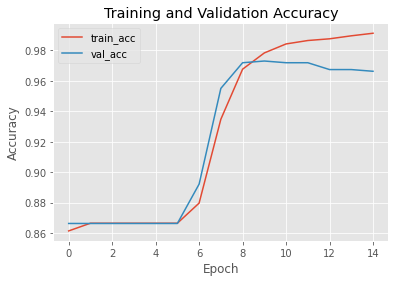

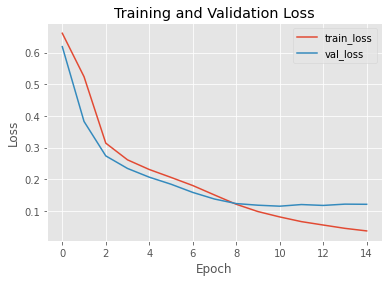

In [242]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H4.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H4.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H4.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H4.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [243]:
loss, accuracy = model4.evaluate(padded_test, y_test, verbose=0)
print('Accuracy : modelo4: %f' % (accuracy*100))

Accuracy : modelo4: 96.672660


#**Parte-5: Pre-trained Embedding**

https://keras.io/examples/nlp/pretrained_word_embeddings/ 

In [193]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-04-22 20:18:47--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-22 20:18:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-22 20:18:48--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [194]:
!unzip -q glove.6B.zip

In [198]:
# load the whole embedding into memory
embeddings_index = dict()

f = open('glove.6B.50d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [210]:
# estamos cargando los word-embeddings de dimensión 50,
# entonces este será la dimensión de nuestro estpacio de vectores embedding:
sz_vec = 50

###Requerimos el Tokenizer:

In [202]:
from keras.preprocessing.text import Tokenizer

In [205]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1

In [207]:
# integer encode the documents
encoded_docs = tokenizer.texts_to_sequences(x_train)
print(encoded_docs)

[[3, 17, 124, 101, 147, 97, 16, 3856], [383, 40, 6, 63, 3857, 1116, 2563, 57, 2564, 3858, 31, 11, 454, 7, 50, 1, 66, 9, 5, 2021], [3859, 6, 182, 37, 3860, 5, 26, 1667, 2, 6, 2565, 2, 190, 167, 24, 6, 604, 98, 17, 13, 45, 5, 181, 46, 284, 13], [3861, 739, 1454, 2, 14, 119, 93, 10, 260, 1668, 7, 1669, 32, 12, 3, 630, 70, 739, 2, 2566, 22, 69, 1670, 179, 2567, 3862, 247, 364], [153, 28, 117, 6, 138, 1117, 35, 3863, 17, 4, 631, 60], [365, 1, 53, 2, 148, 62, 499, 229, 134, 117, 284, 25, 4, 310], [538, 82, 567, 49, 8, 4, 311, 366, 70, 10, 126, 2, 162, 3], [798, 3864, 28, 798, 3, 66], [1, 56, 218, 141, 3, 157, 24, 1, 102, 57, 33, 320], [1, 87, 51, 175, 84, 194, 25, 260, 14, 519], [183, 14, 99, 38, 2022, 196, 4, 799, 420, 520, 800, 163, 18, 1118, 1119, 801, 41, 9, 6, 437, 568, 2, 438, 3, 16, 2023, 859, 2568, 384], [5, 21, 2024, 2, 6, 265, 99, 740, 230, 8, 6, 184, 12, 860, 229, 1011, 279, 475, 3, 67, 80, 2, 3865, 2569, 2570], [52, 14, 407, 12, 1671], [1, 3866, 11, 231, 20, 3, 1672, 2, 2571, 71,

In [208]:
# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=sent_length, padding='post')

print(padded_docs)

[[   3   17  124 ...    0    0    0]
 [ 383   40    6 ...    0    0    0]
 [   6  182   37 ...   46  284   13]
 ...
 [   1  614    5 ...    0    0    0]
 [  81 1099   18 ... 2548   19 1010]
 [ 124   46    2 ...  787   57 1791]]


In [211]:
# create a weight matrix for words in training docs

embedding_matrix = np.zeros((vocab_size, sz_vec))

for word, i in tokenizer.word_index.items():
  
  embedding_vector = embeddings_index.get(word)

  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [215]:
n_epochs = 8


model5 = Sequential()

model5.add(Embedding(input_dim=vocab_size, output_dim=sz_vec,
                     weights=[embedding_matrix], 
                     input_length=sent_length, 
                     trainable=False))


model5.add(Flatten())
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_55 (Embedding)     (None, 25, 50)            396550    
_________________________________________________________________
flatten_54 (Flatten)         (None, 1250)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 1251      
Total params: 397,801
Trainable params: 1,251
Non-trainable params: 396,550
_________________________________________________________________


In [216]:
H5 = model5.fit(x=padded_train, 
                y=y_train, 
                validation_split=0.2, 
                epochs=n_epochs, 
                verbose=1)

Epoch 1/8
112/112 [==============================] - 1s 4ms/step - loss: 0.4499 - accuracy: 0.8438 - val_loss: 0.2845 - val_accuracy: 0.8865
Epoch 2/8
112/112 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8900 - val_loss: 0.2473 - val_accuracy: 0.9056
Epoch 3/8
112/112 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9078 - val_loss: 0.2248 - val_accuracy: 0.9112
Epoch 4/8
112/112 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9299 - val_loss: 0.2125 - val_accuracy: 0.9213
Epoch 5/8
112/112 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9409 - val_loss: 0.2039 - val_accuracy: 0.9247
Epoch 6/8
112/112 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9453 - val_loss: 0.1972 - val_accuracy: 0.9225
Epoch 7/8
112/112 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9562 - val_loss: 0.1928 - val_accuracy: 0.9236
Epoch 8/8
112

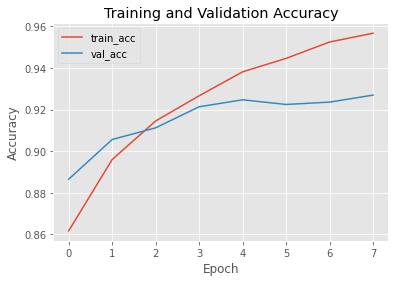

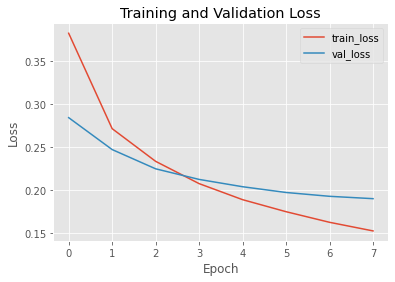

In [217]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H5.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H5.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H5.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H5.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [246]:
loss, accuracy = model5.evaluate(padded_test, y_test, verbose=0)
print('Accuracy : modelo5: %f' % (accuracy*100))

Accuracy : modelo5: 91.007197


### Guardamos el modelo una vez entrenado:

https://keras.io/api/models/model_saving_apis/ 

In [219]:
#model5.save('model5.h5')    # HDF5 file ... en este caso de aprox 1.6 MB

#del model5  # deletes the model

In [245]:
# una vez salvado lo podemos recuperar para usarlo:

#from keras.models import load_model

#model5r = load_model('model5.h5')